In [1]:
import pandas as pd
import numpy as np

h5_path = '/Users/thomasbush/Documents/Vault/Iurilli_lab/3d_tracking/data/data_3d/multicam_video_2024-08-07T15_09_26_cropped_20250325101012_triangulated_points_20250331-065044_dlc_checkerboard.h5'

In [2]:
df = pd.read_hdf(h5_path)

In [30]:
df['movement']['X'].columns

KeyError: 'X'

In [6]:
# If it's a DLC-style multi-index
bodyparts = df.columns.get_level_values(1).unique()
coords = df.columns.get_level_values(2).unique()

n_keypoints = len(bodyparts)
n_coords = len(coords)  # should be 3 (x, y, z)

print(f"Detected {n_keypoints} keypoints with {n_coords} coordinates each.")


Detected 13 keypoints with 4 coordinates each.


In [7]:
keypoints = df.to_numpy().reshape((-1, 13, 4))  # shape: (n_frames, 13, 4)
xyz = keypoints[:, :, :3]  # shape: (n_frames, 13, 3)
confidence = keypoints[:, :, 3]  # optional, shape: (n_frames, 13)


In [8]:
var_per_kpt = np.var(xyz, axis=0)  # (13, 3)
total_var_per_kpt = np.sum(var_per_kpt, axis=1)


In [9]:
frame_energy = np.linalg.norm(np.diff(xyz, axis=0), axis=(1,2))  # (n_frames - 1,)


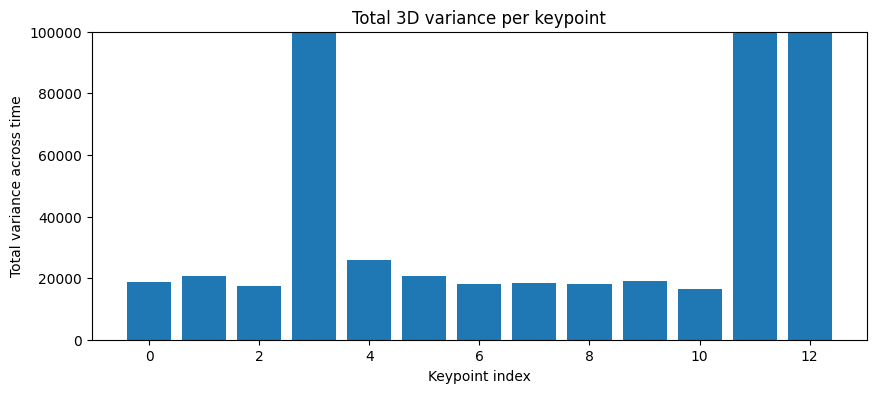

In [20]:
import matplotlib.pyplot as plt

var_per_kpt = np.var(xyz, axis=0)  # shape (13, 3)
total_var_per_kpt = np.sum(var_per_kpt, axis=1)

plt.figure(figsize=(10, 4))
plt.bar(range(13), total_var_per_kpt)
plt.xlabel("Keypoint index")
plt.ylabel("Total variance across time")
plt.title("Total 3D variance per keypoint")
plt.ylim(0, 1e5)
plt.show()


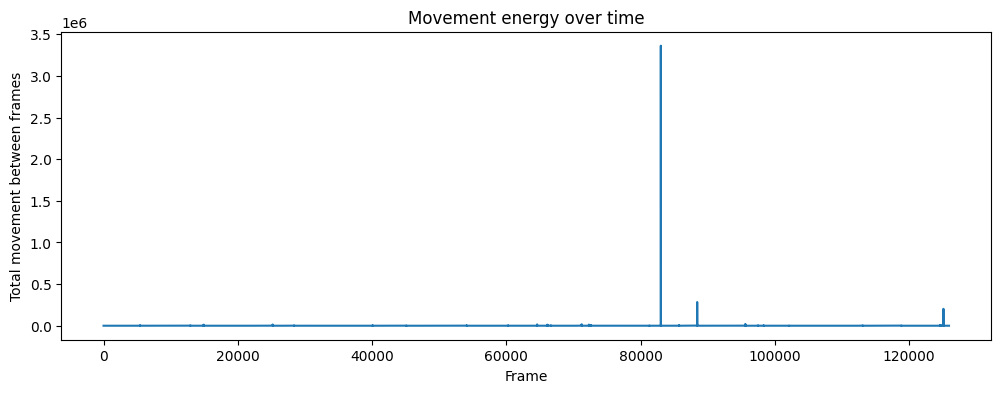

In [11]:
frame_energy = np.linalg.norm(np.diff(xyz, axis=0), axis=(1, 2))

plt.figure(figsize=(12, 4))
plt.plot(frame_energy)
plt.xlabel("Frame")
plt.ylabel("Total movement between frames")
plt.title("Movement energy over time")
plt.show()


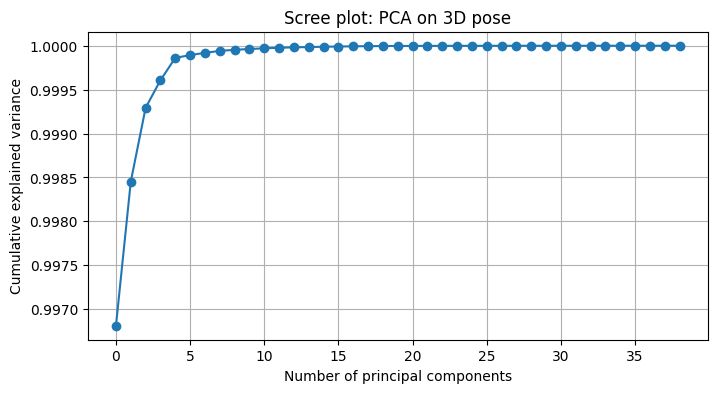

In [12]:
from sklearn.decomposition import PCA

# Flatten pose into (n_frames, 13*3)
pose_flat = xyz.reshape(xyz.shape[0], -1)

pca = PCA()
pca.fit(pose_flat)

explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_var_ratio), marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("Scree plot: PCA on 3D pose")
plt.grid()
plt.show()
